# Obesity Risk Prediction

## Project Overview:
This project aims to predict obesity risk in individuals based on various factors related to their eating habits, physical condition, and lifestyle. The dataset used for training and testing was generated from a deep learning model trained on the Obesity or Cardiovascular Disease (CVD) risk dataset. The competition objective is to predict the class of NObeyesdad (Obesity Level) for each individual in the test dataset.

## Dataset Information:
The dataset includes data from individuals in Mexico, Peru, and Colombia, containing 17 attributes and 2111 records. The attributes include features such as Gender, Age, Height, Weight, family_history_with_overweight, FAVC (Frequency of High Caloric Food Consumption), FCVC (Frequency of Vegetable Consumption), and more. The target variable, NObeyesdad, represents the obesity level, categorized as Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.


| Attribute                     | Description                                                                                                 |
|-------------------------------|-------------------------------------------------------------------------------------------------------------|
| Gender                        | Gender of the individual                                                                                    |
| Age                           | Age of the individual                                                                                       |
| Height                        | Height of the individual (in centimeters)                                                                   |
| Weight                        | Weight of the individual (in kilograms)                                                                    |
| family_history_with_overweight| Whether the individual has a family member who suffered or suffers from overweight                           |
| FAVC                          | Whether the individual frequently eats high-caloric food                                                     |
| FCVC                          | Frequency of vegetable consumption in meals                                                                 |
| NCP                           | Number of main meals consumed daily                                                                         |
| CAEC                          | Whether the individual eats any food between meals                                                          |
| SMOKE                         | Whether the individual smokes                                                                               |
| CH2O                          | Daily water intake (in liters)                                                                              |
| SCC                           | Whether the individual monitors the calories they eat daily                                                 |
| FAF                           | Frequency of physical activity                                                                              |
| TUE                           | Time spent using technological devices such as cell phone, videogames, television, computer, etc. (in hours)|
| CALC                          | Frequency of alcohol consumption                                                                             |
| MTRANS                        | Mode of transportation usually used by the individual                                                        |
| NObeyesdad                    | Obesity level categorized as Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III|

## Objective:
The goal of this project is to predict obesity risk in individuals, which is related to cardiovascular disease. Participants are encouraged to explore the dataset, perform exploratory data analysis (EDA), visualize feature distributions, and develop machine learning models to predict the obesity level.

## Dataset Description:
train.csv   : The training dataset containing feature variables and the categorical target variable, NObeyesdad.
test.csv    : The test dataset for which predictions need to be made for the target variable.

## Import Libraries

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pycaret.classification import *
warnings.filterwarnings("ignore")

## Load dataset

In [39]:
# Original Data
df_o = pd.read_csv('obesity.csv')
# Train Data
df_train = pd.read_csv('train.csv')
# Test Data
df_test = pd.read_csv('test.csv')
# Submission Data
df_sub = pd.read_csv('sample_submission.csv')

In [40]:
# drop id
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

In [41]:
# Concat Train and Original Data
df_train = pd.concat([df_train, df_o], ignore_index=True)

## Data Overview

### Data Head

In [42]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [43]:
df_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


### Data Shape

In [44]:
df_train.shape

(22869, 17)

In [45]:
df_test.shape

(13840, 16)

### Data Information

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             

### Numerical summary

In [48]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,22869.0,23.885263,5.753419,14.00,20.000000,22.815416,26.000000,61.00
Height,22869.0,1.700377,0.087881,1.45,1.631662,1.700000,1.763029,1.98
Weight,22869.0,87.767610,26.364243,39.00,66.000000,84.000000,111.531208,173.00
FCVC,22869.0,2.443428,0.533329,1.00,2.000000,2.392665,3.000000,3.00
NCP,22869.0,2.754344,0.712711,1.00,3.000000,3.000000,3.000000,4.00
CH2O,22869.0,2.027442,0.608901,1.00,1.755907,2.000000,2.535127,3.00
FAF,22869.0,0.984382,0.839466,0.00,0.015860,1.000000,1.596576,3.00
TUE,22869.0,0.620551,0.602850,0.00,0.000000,0.579541,1.000000,2.00


In [49]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,13840.0,23.952740,5.799814,14.00,20.000000,22.906342,26.000000,61.000000
Height,13840.0,1.698934,0.088761,1.45,1.631662,1.700000,1.760710,1.980000
Weight,13840.0,87.384504,26.111819,39.00,65.000000,83.952968,111.157811,165.057269
FCVC,13840.0,2.442898,0.531606,1.00,2.000000,2.358087,3.000000,3.000000
NCP,13840.0,2.750610,0.710927,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,13840.0,2.032044,0.611230,1.00,1.771781,2.000000,2.552388,3.000000
FAF,13840.0,0.974532,0.840361,0.00,0.001086,1.000000,1.571865,3.000000
TUE,13840.0,0.611033,0.608005,0.00,0.000000,0.552498,1.000000,2.000000


### Check missing values

In [35]:
df_train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [46]:
df_test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

### Duplicate Values

In [36]:
print(f"Number of duplicate in train data: {df_train.duplicated().sum()}")

Number of duplicate in train data: 24


In [37]:
print(f"Number of duplicate in test data: {df_test.duplicated().sum()}")

Number of duplicate in test data: 0


## Exploratory Data Analysis (EDA)

In [7]:
# Create function to see the distribution of data.
def countplot(df, column):
    palette = sns.color_palette('YlGnBu', n_colors=len(df[column].value_counts()))

    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # Bar Chart
    value_counts = df[column].value_counts()
    axes[0].bar(value_counts.index, value_counts.values, color=palette)
    axes[0].set_title(f'Count of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Rotate labels

    # Pie Chart
    axes[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=palette)
    axes[1].set_title(f'Percentage of {column}')

    plt.tight_layout()
    plt.show()

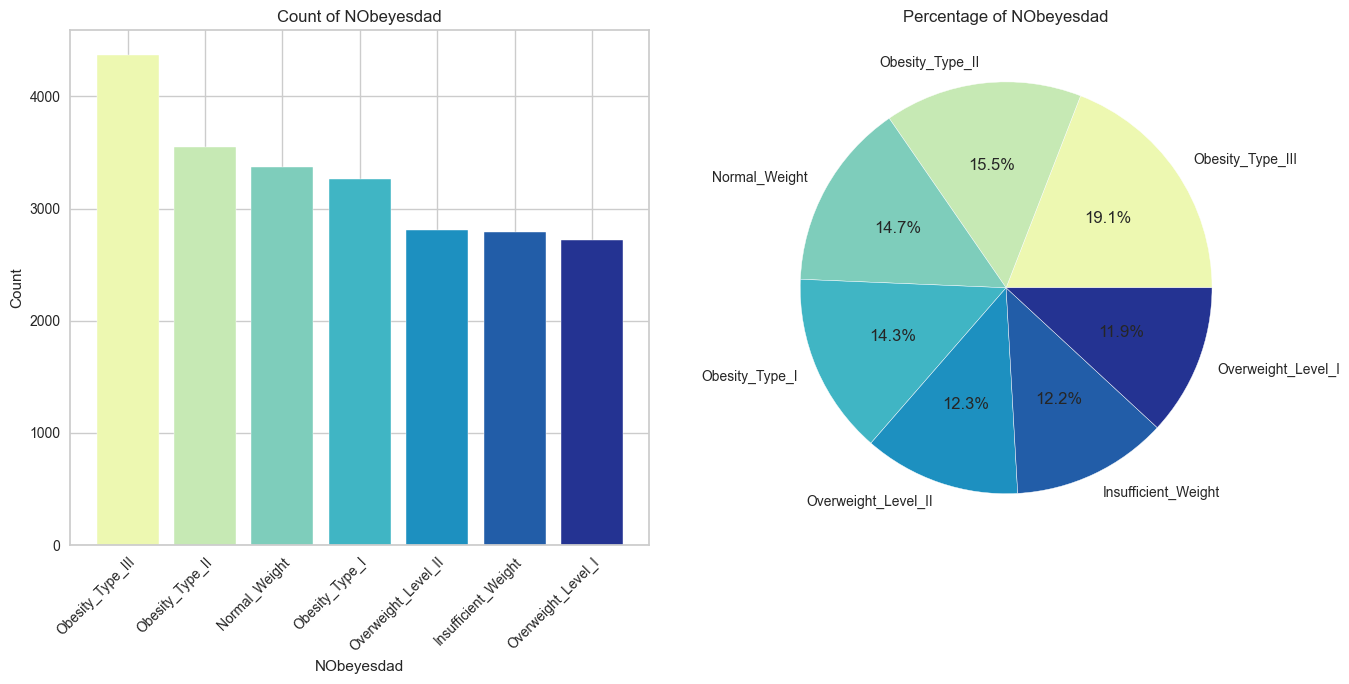

In [8]:
# Plotting the distribution of obesity levels in the training data.  
countplot(df_train, 'NObeyesdad')

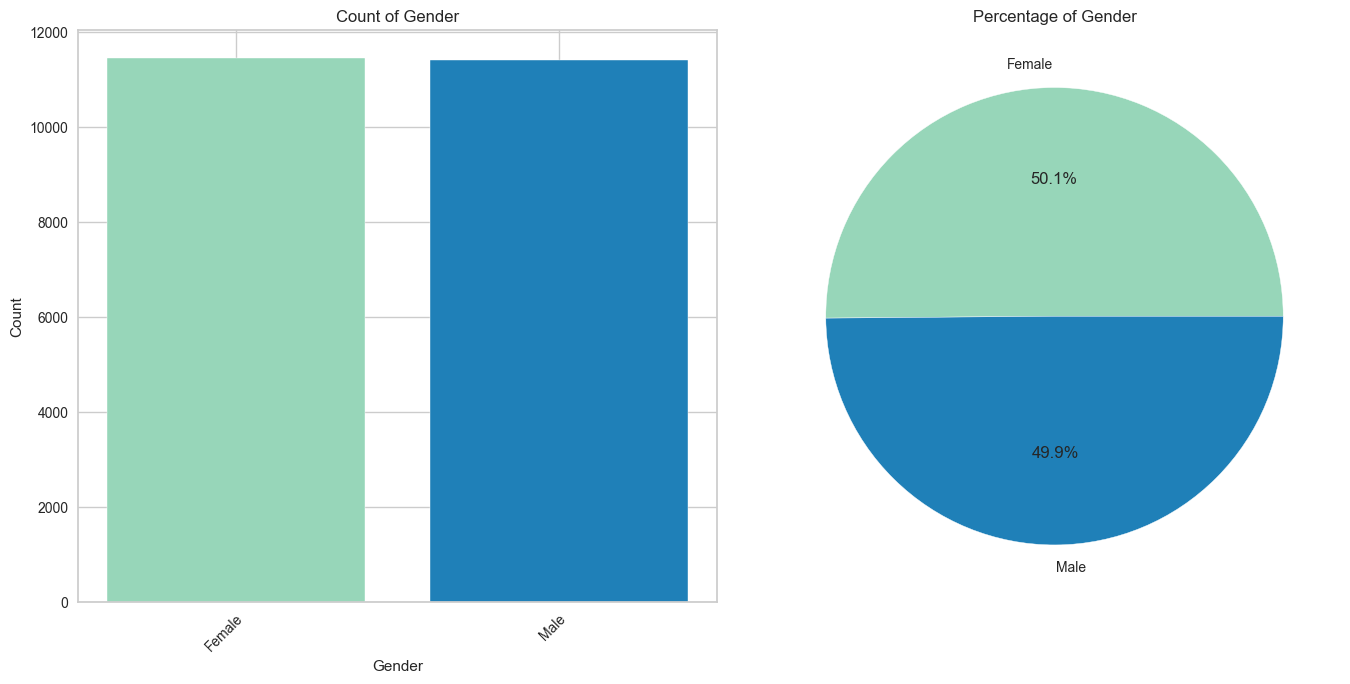

In [9]:
# Plotting the distribution of gender data in the training data.  
countplot(df_train, 'Gender')

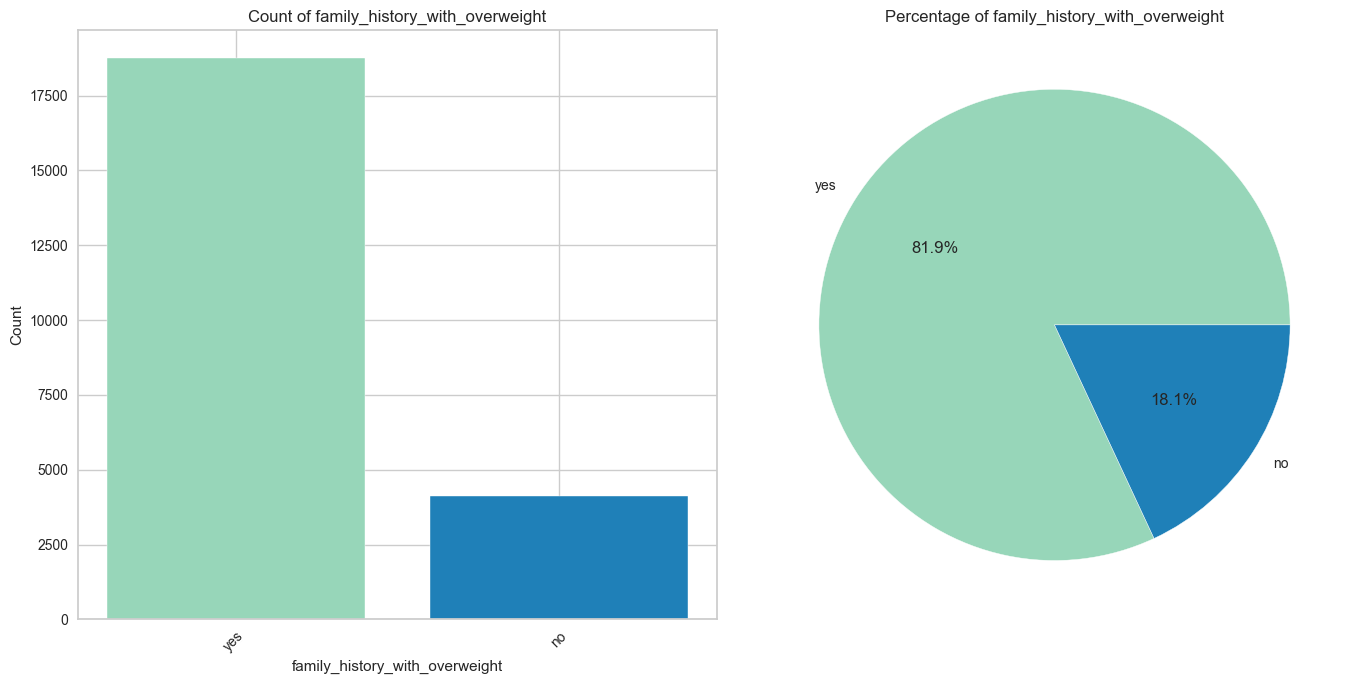

In [10]:
# Plotting the distribution of family history with overweight in the training data.  
countplot(df_train, 'family_history_with_overweight')

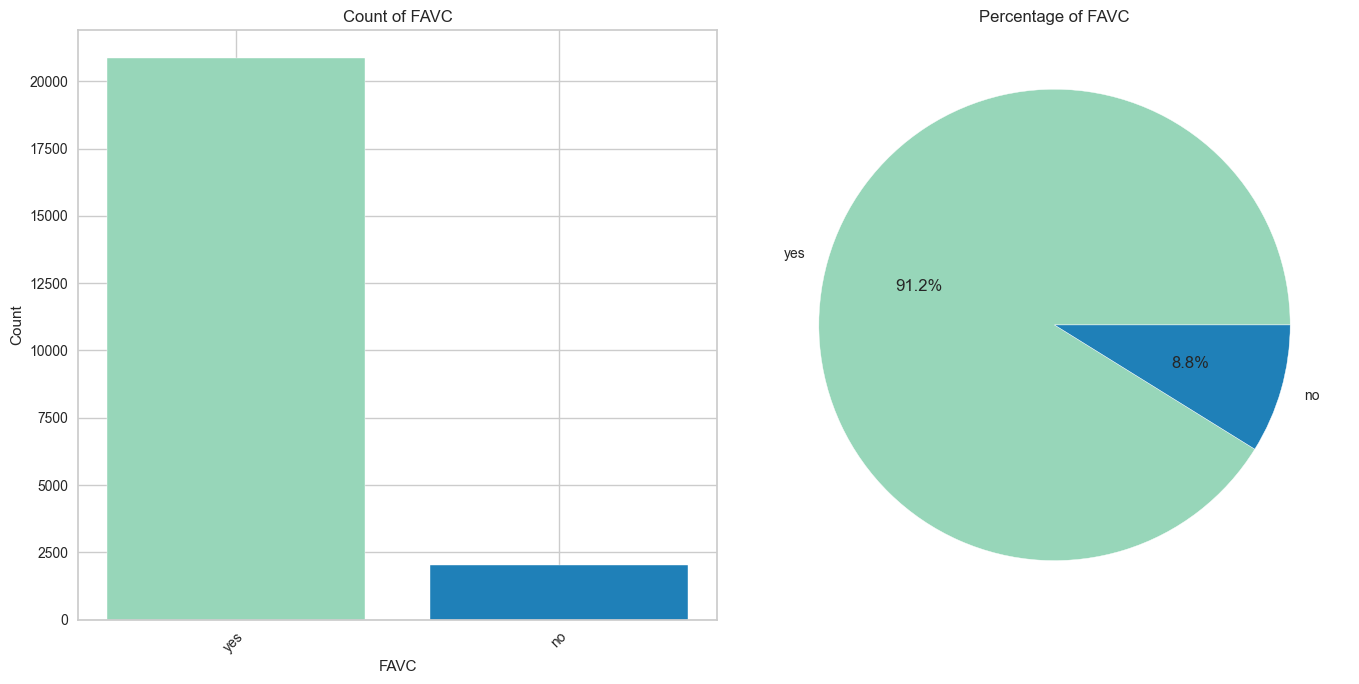

In [14]:
countplot(df_train, 'FAVC')

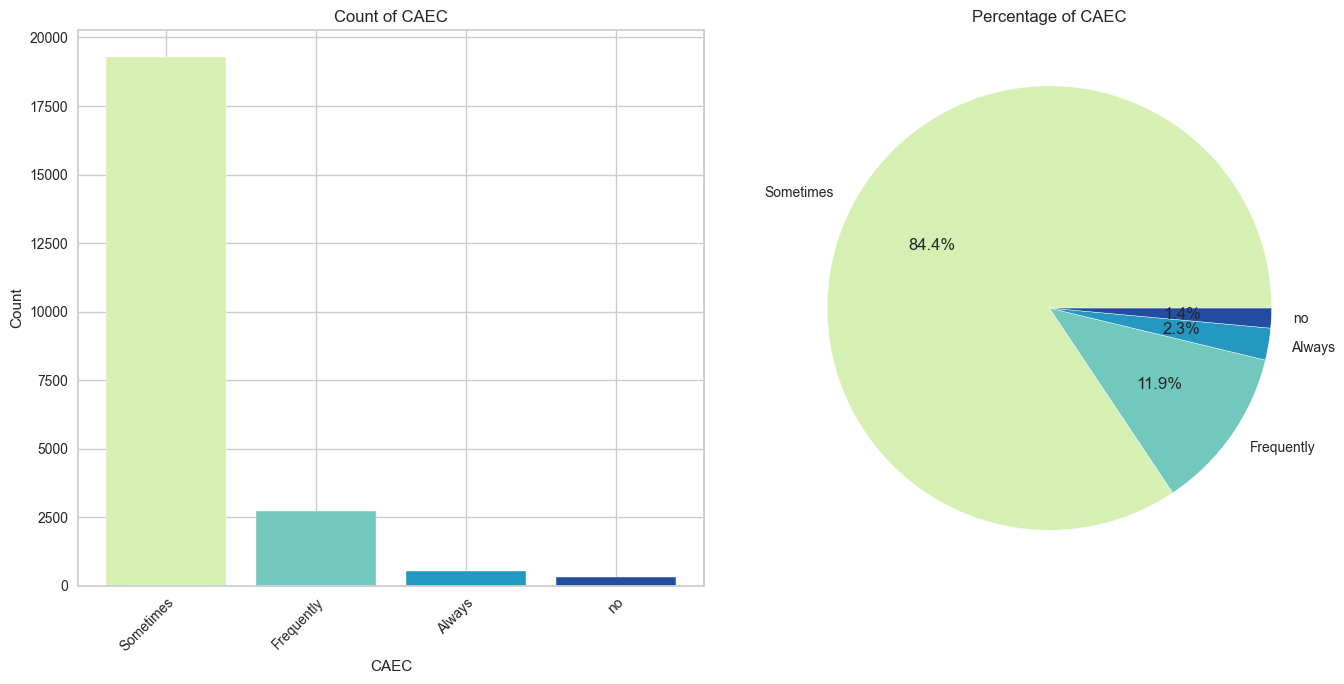

In [15]:
countplot(df_train, 'CAEC')

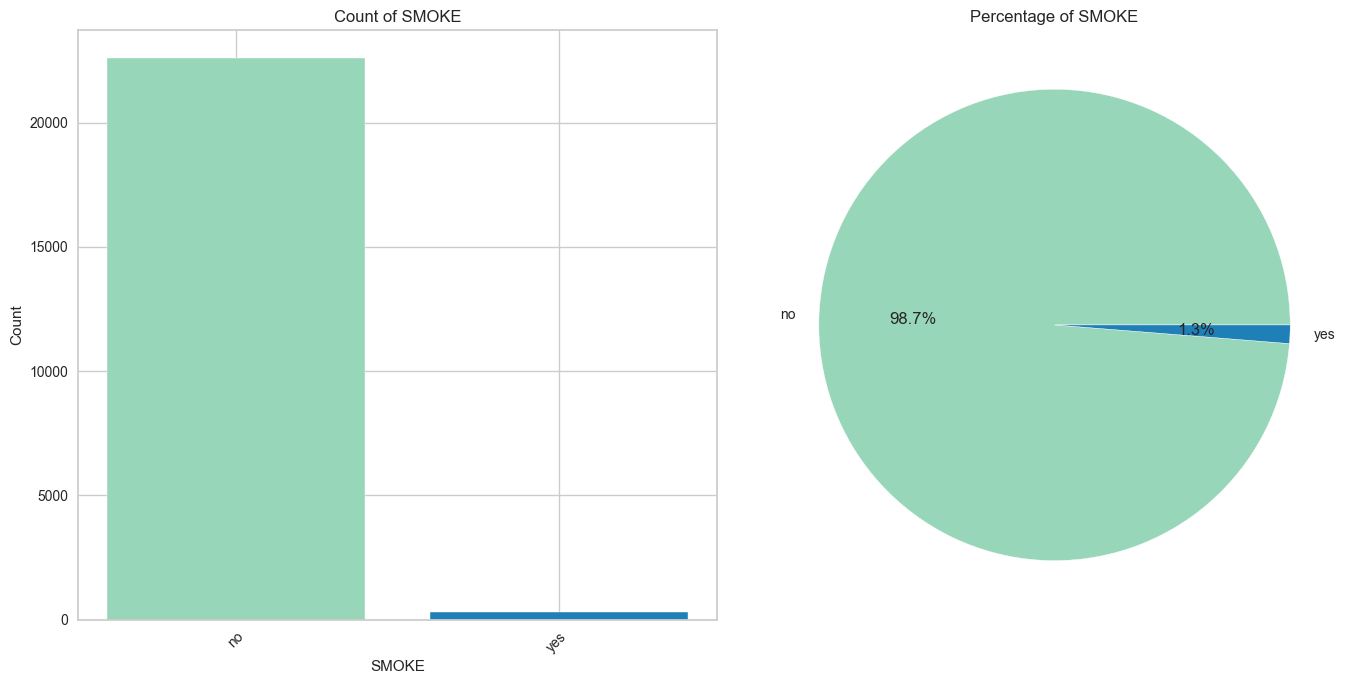

In [16]:
countplot(df_train, 'SMOKE')

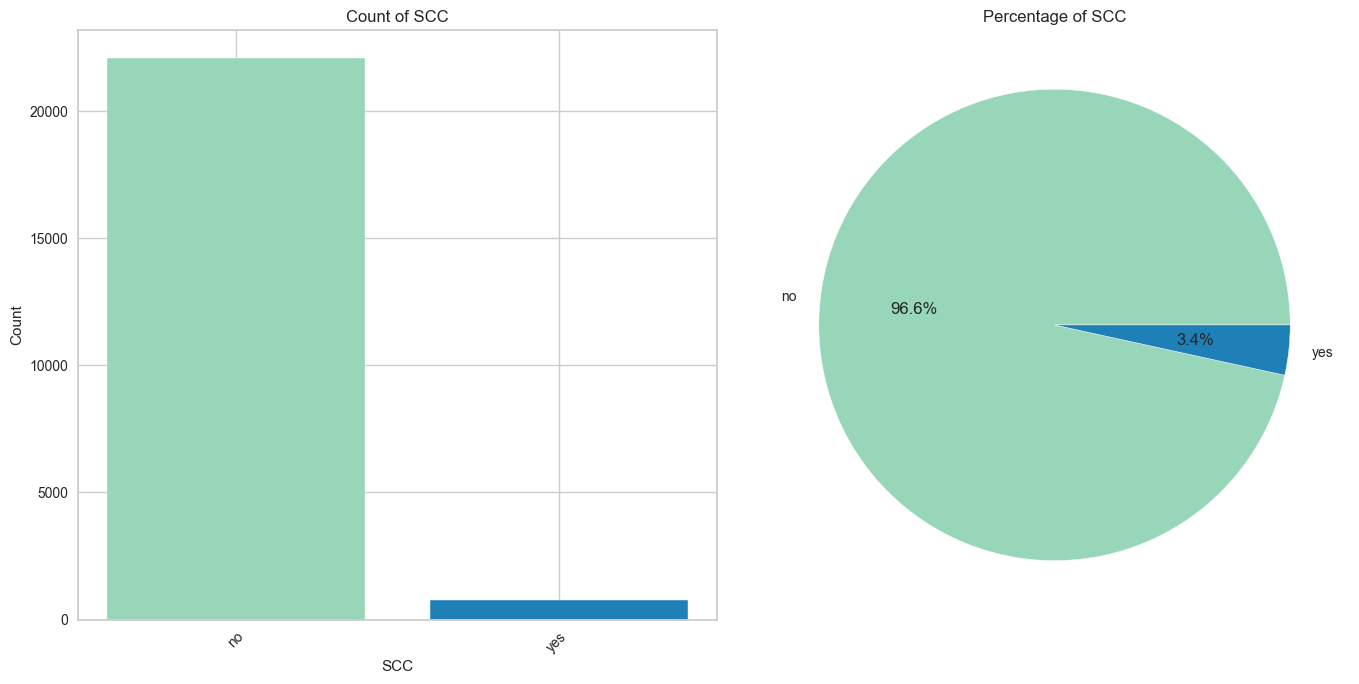

In [17]:
countplot(df_train, 'SCC')

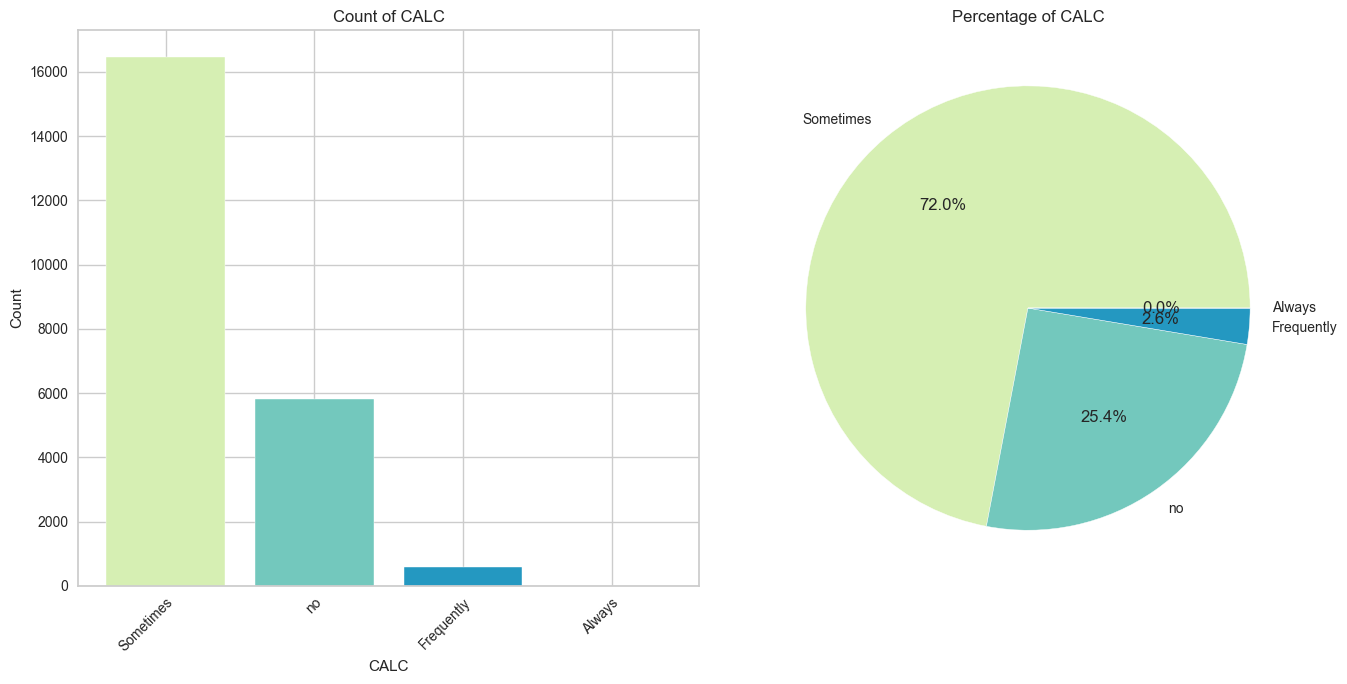

In [18]:
countplot(df_train, 'CALC')

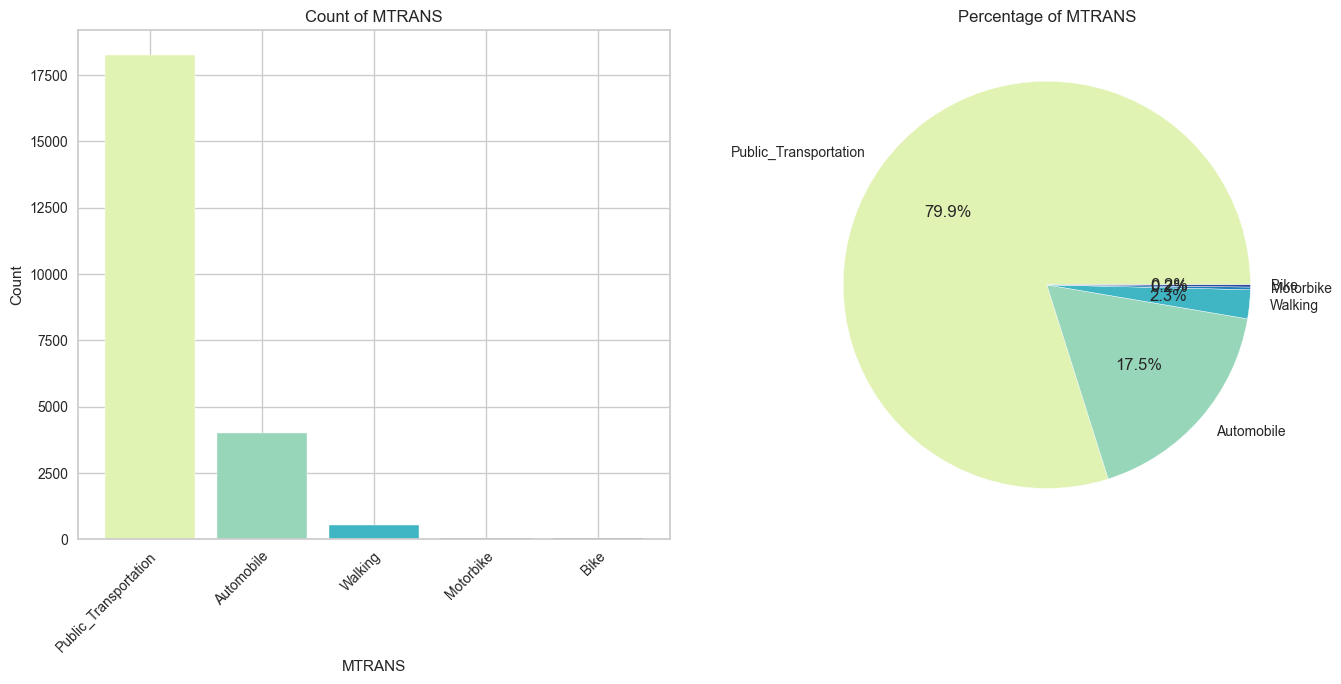

In [19]:
countplot(df_train, 'MTRANS')

In [12]:
# Future Engineering to create Age category (e.g., young, adult, elderly)
df_train['Age_cat'] = pd.cut(df_train['Age'], bins=[0, 18, 60, float('inf')], labels=['Young', 'Adult', 'Elderly'])

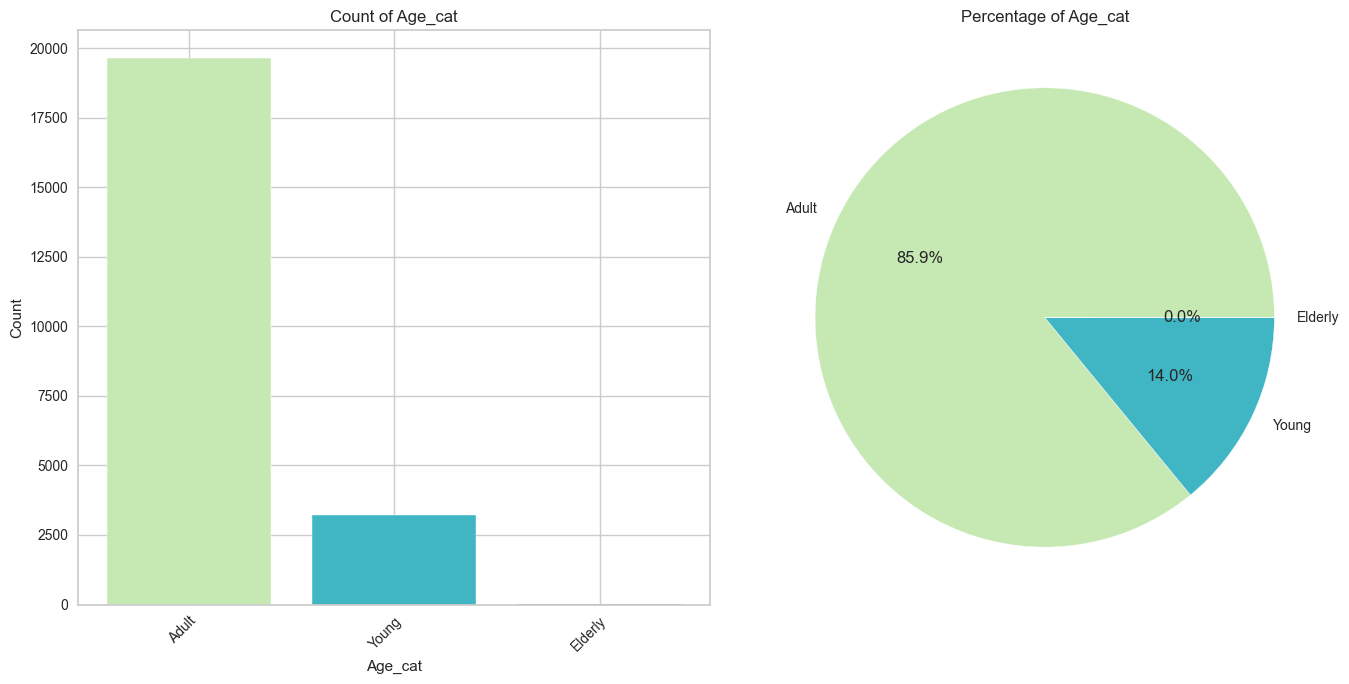

In [13]:
countplot(df_train, 'Age_cat')

## Data Distribution

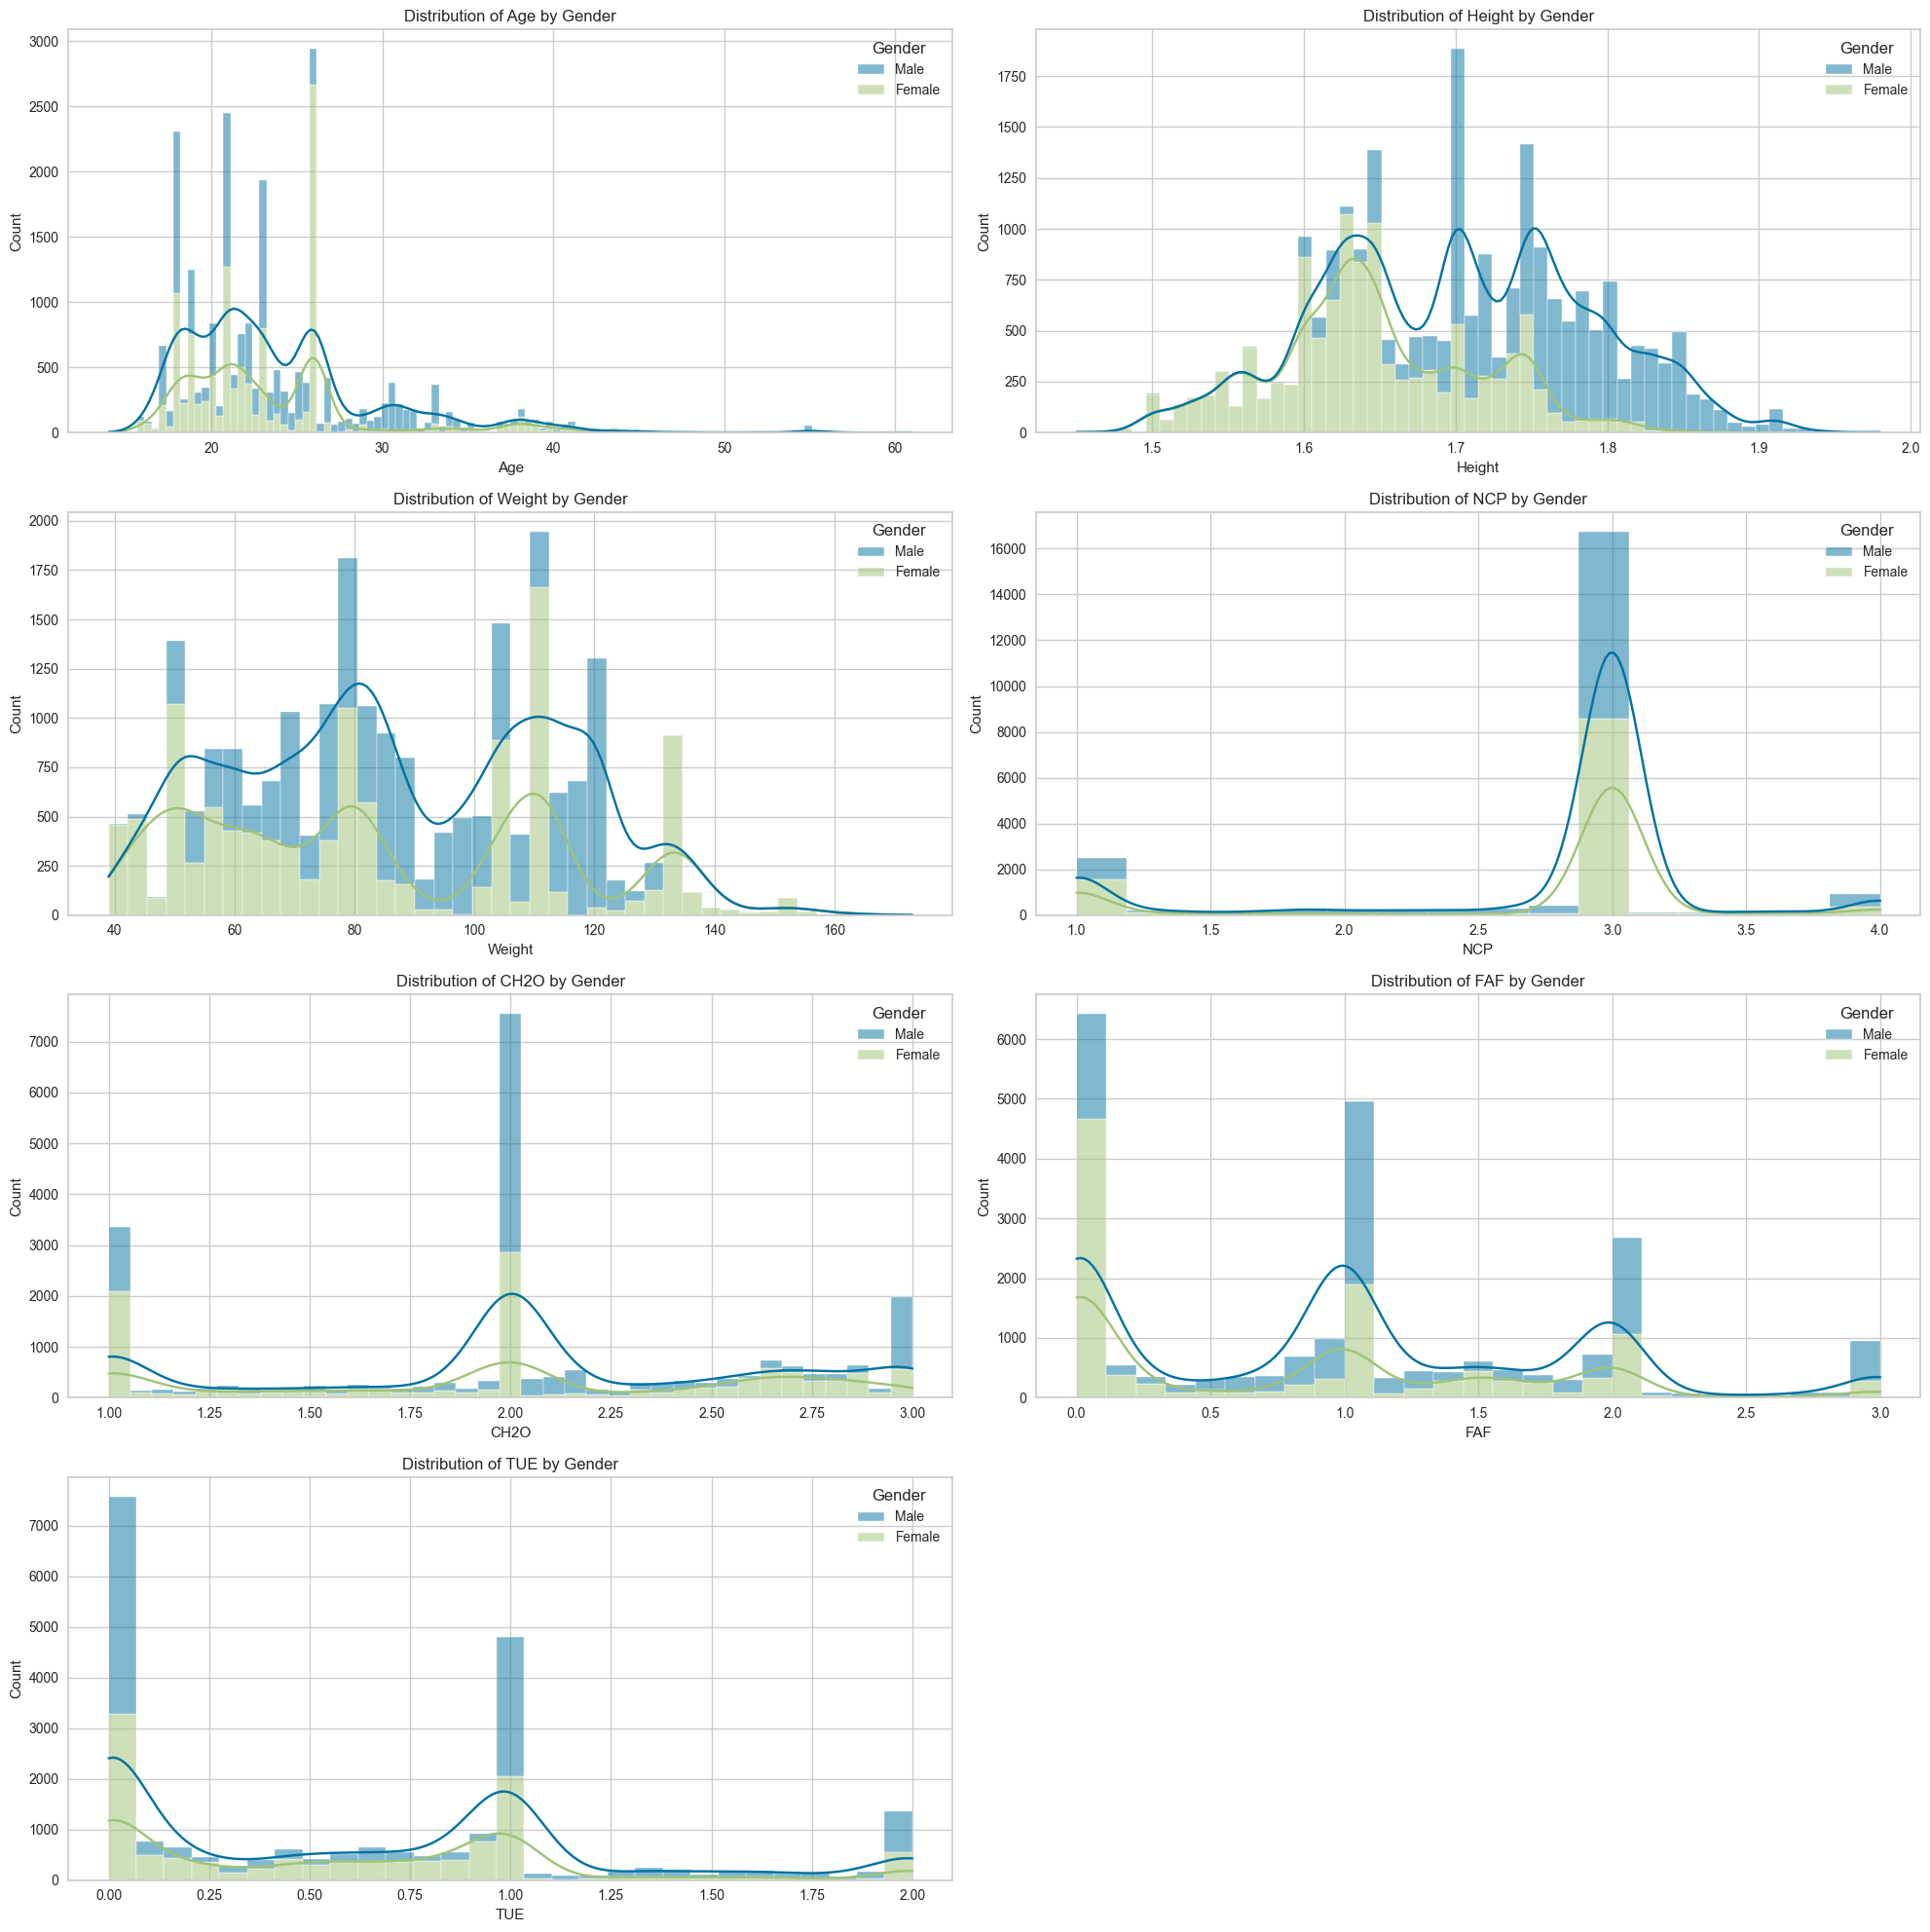

In [22]:
# Plot distribution of Numeric features
continuous_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(20, 20))  # Adjust the size of the overall figure
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df_train, x=feature, hue='Gender', kde=True, multiple="stack")
    plt.title(f'Distribution of {feature} by Gender')
plt.tight_layout()
plt.show()

## Correlation Analysis

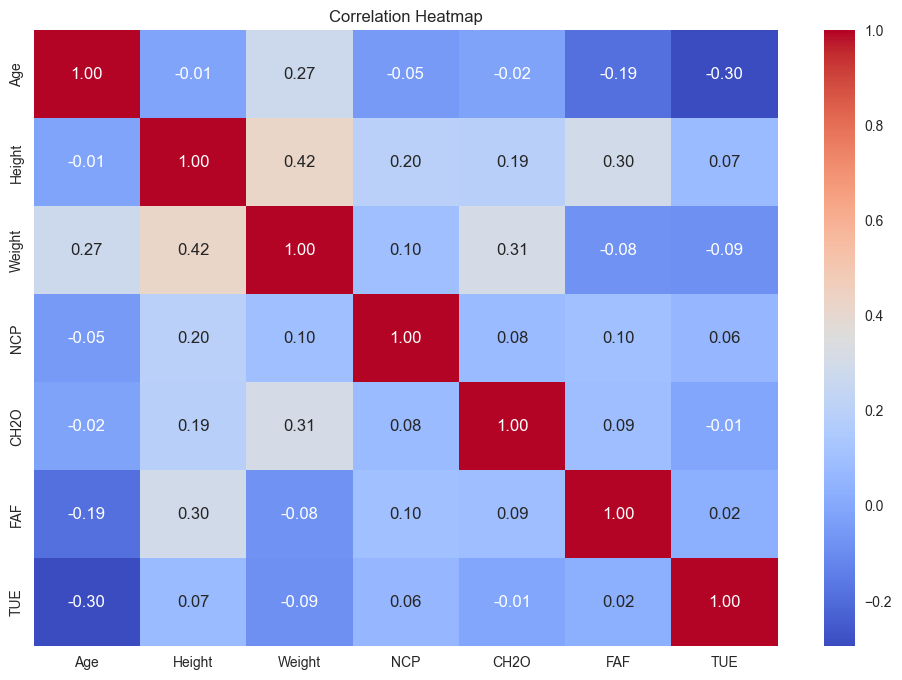

In [23]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[continuous_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Modelling using PyCaret

Setup ➡️ Compare Models ➡️ Analyze Model ➡️ Prediction ➡️ Save Model

### Setup

In [114]:
# Initialize the setup
clf_setup = setup(
    data=df_train,
    target='NObeyesdad',  # Target variable
    ignore_features=['Age_cat'],
    categorical_features=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'],  # Categorical features
    numeric_features=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'],  # Numeric features
    normalize=True,  # Normalize the data
    session_id=123  # Set a random seed for reproducibility
)

,Description,Value
0,Session id,123
1,Target,NObeyesdad
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(22869, 18)"
5,Transformed data shape,"(22869, 27)"
6,Transformed train set shape,"(16008, 27)"
7,Transformed test set shape,"(6861, 27)"
8,Ignore features,1
9,Numeric features,8


### Compare Models

In [115]:
# Compare models and select the best one
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9107,0.9912,0.9107,0.9107,0.9105,0.8954,0.8954,2.3330
lightgbm,Light Gradient Boosting Machine,0.9106,0.9913,0.9106,0.9109,0.9104,0.8952,0.8953,18.7600
gbc,Gradient Boosting Classifier,0.9097,0.0000,0.9097,0.9098,0.9095,0.8941,0.8942,21.4810
rf,Random Forest Classifier,0.9001,0.9890,0.9001,0.9004,0.8997,0.8828,0.8830,3.1340
et,Extra Trees Classifier,0.8711,0.9830,0.8711,0.8719,0.8706,0.8488,0.8491,2.4310
lr,Logistic Regression,0.8689,0.0000,0.8689,0.8677,0.8678,0.8463,0.8465,1.9110
dt,Decision Tree Classifier,0.8481,0.9125,0.8481,0.8486,0.8480,0.8220,0.8221,0.4980
lda,Linear Discriminant Analysis,0.8280,0.0000,0.8280,0.8273,0.8263,0.7985,0.7989,0.3330
knn,K Neighbors Classifier,0.7479,0.9236,0.7479,0.7444,0.7446,0.7044,0.7048,0.9150
svm,SVM - Linear Kernel,0.7187,0.0000,0.7187,0.7134,0.7132,0.6703,0.6714,1.0520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Tune Model

In [116]:
# Tune the best model
tuned_model = tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:50:07
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8982,0.9894,0.8982,0.8986,0.8980,0.8806,0.8808
1,0.9144,0.9913,0.9144,0.9148,0.9146,0.8997,0.8997
2,0.9144,0.9925,0.9144,0.9136,0.9138,0.8997,0.8997
3,0.9119,0.9925,0.9119,0.9123,0.9115,0.8968,0.8969
4,0.9332,0.9939,0.9332,0.9331,0.9331,0.9217,0.9217
5,0.9219,0.9936,0.9219,0.9224,0.9219,0.9085,0.9086
6,0.9032,0.9916,0.9032,0.9040,0.9029,0.8865,0.8867
7,0.9088,0.9911,0.9088,0.9091,0.9087,0.8931,0.8932
8,0.9200,0.9927,0.9200,0.9197,0.9196,0.9062,0.9063


### Analyze Model

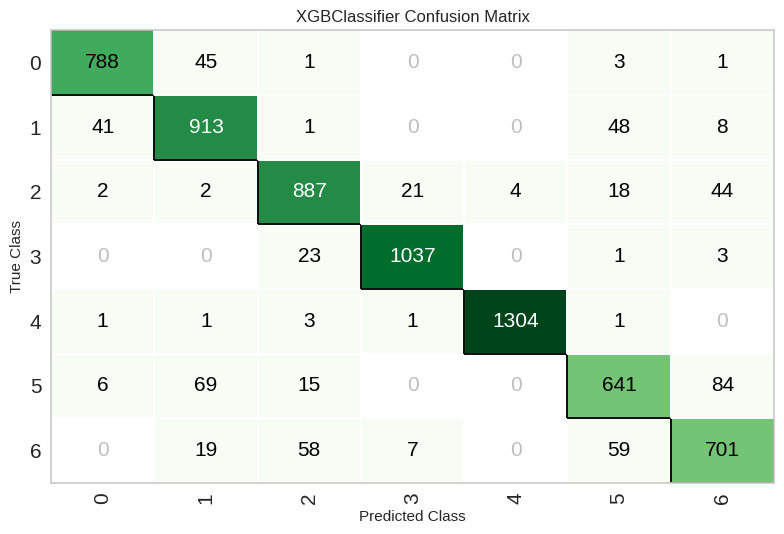

In [117]:
# Plot confusion matrix for the tuned model
plot_model(tuned_model, plot='confusion_matrix')

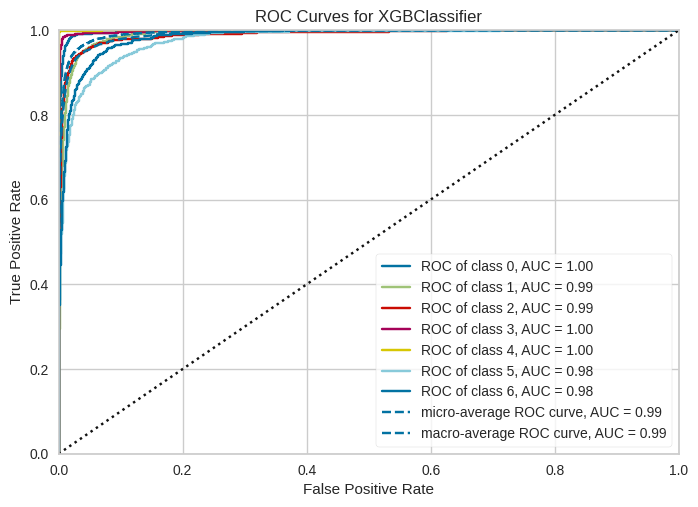

In [118]:
# Plot AUC (Area Under the Curve) for the tuned model
plot_model(tuned_model, plot='auc')

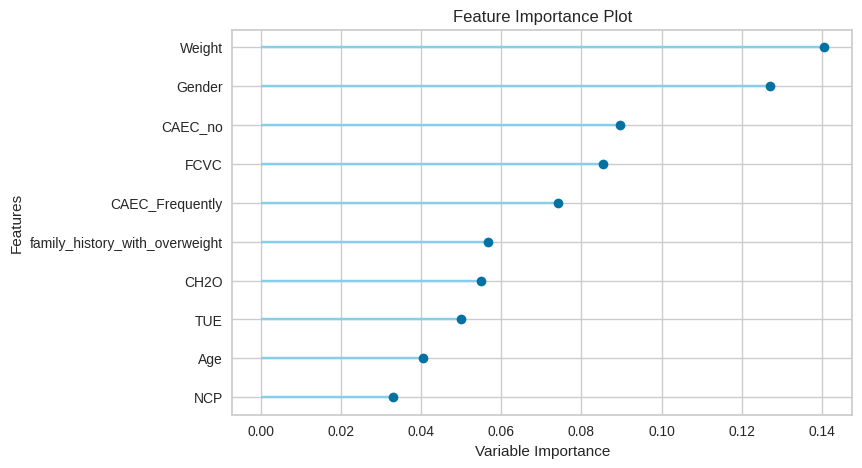

In [119]:
# Plot feature importance
plot_model(tuned_model, plot='feature')

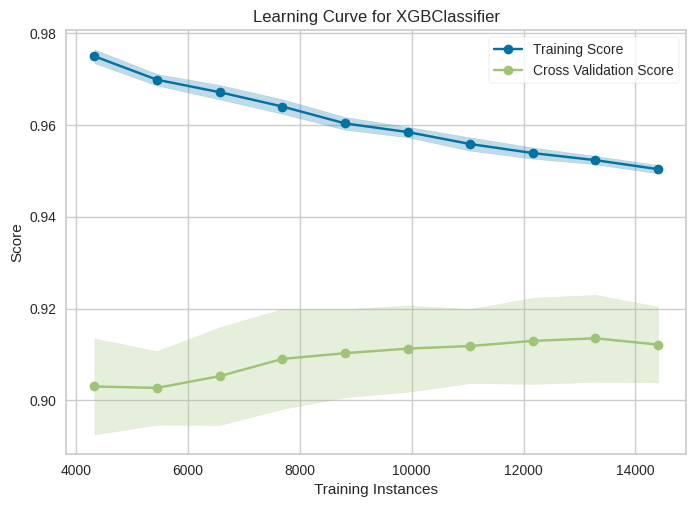

In [120]:
# Plot learning curve
plot_model(tuned_model, plot='learning')

### Finalize Model

In [121]:
# Finalize the model (train on the entire dataset)
final_model = finalize_model(tuned_model)

### Predictions

In [123]:
# Predict using the test data
predictions = predict_model(final_model, data=df_test)

# Display predictions head
predictions.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,prediction_label,prediction_score
0,Male,26.899885,1.848294,120.644180,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,Obesity_Type_II,0.9977
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,0.9756
2,Female,26.000000,1.643355,111.600555,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,Obesity_Type_III,0.9995
3,Male,20.979254,1.553127,103.669113,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,Obesity_Type_I,0.9740
4,Female,26.000000,1.627396,104.835342,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,Obesity_Type_III,0.9926


### Save Models

In [127]:
# Save the finalized model
save_model(final_model, 'final_obesity_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Height', 'Weight', 'FCVC',
                                              'NCP', 'CH2O', 'FAF', 'TUE'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_...
                                feature_types=None, gamma=None, grow_policy=None,
                                importance_type=None,
                                interaction_constraints=None, learning_

--d